In [2]:
import re
import pandas as pd 
import numpy as np  # 
import matplotlib.pyplot as plt 
import jieba 
from wordcloud import WordCloud #

In [3]:
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15.,15.]

In [4]:
data = pd.read_csv('CarCon.csv',encoding='gbk')
data.head() 

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN
3,众泰E200,众泰,微型车,4.65,69900,69900,61,"悬架减震硬,后备厢空间有点小,悬架减震偏硬",45,"外观时尚,乘坐空间不错,安全配置挺好,悬架减震硬,转向手感很轻,乘坐空间完全够用,后备厢空间...",212,"外观时尚,乘坐空间不错,安全配置挺好",113,11.4,11.4
4,江铃E200L,江铃集团新能源,微型车,4.51,90800,82800,9,"充电速度太长了,续航里程短",6,"充电速度太长了,续航里程短,乘坐空间可以的",9,乘坐空间可以的,3,10.0,10.0


In [5]:
data.sort_values('评分',ascending=False).head() 

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
282,上汽大通V80,上汽大通,轻客,4.88,1300000,135800,8,NaN,0,"乘坐空间不错,油耗满意,外观漂亮",10,"乘坐空间不错,外观漂亮,油耗满意",10,NaN,NaN
324,U5 SUV,纳智捷,小型SUV,4.88,99800,75800,11,"味道很大,悬架偏硬,起步动力有点肉",11,"油耗满意,乘坐空间很满意,外观时尚,车子配置推荐,后备厢空间大,后排空间很大,转向精准,储物...",114,"油耗满意,乘坐空间很满意,外观时尚",66,NaN,NaN
186,捷豹F-TYPE,捷豹,跑车,4.88,1628000,598000,3,NaN,0,乘坐空间不错,3,乘坐空间不错,3,12.0,12.0
195,斯派卡,野马汽车,MPV,4.88,75800,59800,11,NaN,0,乘坐空间满意,7,乘坐空间满意,7,NaN,NaN
273,优劲,开瑞,微卡,4.88,46500,34500,15,NaN,0,"乘坐空间能装,油耗满意,外观漂亮",16,"乘坐空间能装,油耗满意,外观漂亮",16,8.2,8.2


In [6]:
data.sort_values('最高价',ascending=False).head() 

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
190,保时捷911,保时捷,跑车,4.41,3898000,1228000,27,悬架减震硬,4,"油耗能接受,外观满意,乘坐空间大,悬架减震硬,操控一级棒,内饰造型满意,前排空间很充裕,路感...",46,"油耗能接受,外观满意,乘坐空间大",26,13.9,10.0
505,奔驰G级AMG,奔驰,中大型SUV,3.96,3532800,2146800,9,乘坐空间不够,3,"外观霸气,乘坐空间不够",9,外观霸气,6,NaN,NaN
184,Panamera新能源,保时捷,大型车,4.44,2548000,1198000,4,NaN,0,乘坐空间不错,4,乘坐空间不错,4,8.3,26.0
182,宝马7系,宝马,大型车,4.56,2488000,828000,70,"胎噪有点大,储物空间偏少",12,"乘坐空间没的说,油耗满意,操控很好,车子配置很高,外观很霸气,后排空间大,隔音安静,转向手感...",164,"乘坐空间没的说,油耗满意,操控很好",92,10.4,11.9
185,Panamera,保时捷,大型车,4.36,2178000,998000,63,"储物空间比较少,内饰颜色单一,转向手感太重",24,"乘坐空间还不错,外观稳重,油耗满意,储物空间比较少,车尾灯很赞,操控很好,后排空间大,内饰造...",139,"乘坐空间还不错,外观稳重,油耗满意",78,12.5,12.4


In [7]:
data.sort_values('最低价',ascending=False).tail() 

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
262,长安之星3,长安欧尚,微面,3.99,39900,29900,43,"发动机噪音很大,起步动力肉",9,"乘坐空间够用,油耗满意,外观漂亮,保养费用便宜,大灯犀利,发动机噪音很大,高速油耗稳定,内饰...",69,"乘坐空间够用,油耗满意,大灯犀利",37,6.8,7.0
280,五菱之光小卡,五菱汽车,微卡,3.84,32900,29900,23,后排空间太小,3,"油耗满意,后排空间太小",9,油耗满意,6,7.5,7.5
265,东风小康K07S,东风小康,微面,3.88,32900,28900,3,NaN,0,乘坐空间没问题,3,乘坐空间没问题,3,6.6,6.6
266,佳宝V75,一汽,微面,3.88,30900,28900,8,NaN,0,油耗满意,4,油耗满意,4,7.0,7.0
270,佳宝V52,一汽,微面,3.67,29200,27200,45,NaN,0,"油耗比较低,乘坐空间没的说",13,"油耗比较低,乘坐空间没的说",13,7.3,7.3


In [8]:
data.sort_values('好评词次数',ascending=False).head() 

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
100,阿特兹,马自达,中型车,4.66,237800,175800,4445,"胎噪有点大,隔音不好,悬架减震偏硬",1425,"外观漂亮,油耗满意,乘坐空间够用,安全配置稳定,后备厢空间很大,操控之王,转向精准,转向手感...",11071,"外观漂亮,油耗满意,乘坐空间够用",6114,8.3,8.8
402,RAV4荣放,丰田,紧凑型SUV,4.61,269800,179800,4009,"悬架减震偏硬,隔音不好,味道大",1060,"乘坐空间满意,油耗满意,外观时尚,安全配置齐全,悬架减震偏硬,后排空间大,后备厢空间很大,转...",10244,"乘坐空间满意,油耗满意,外观时尚",6001,8.6,10.0
385,马自达CX-4,马自达,紧凑型SUV,4.65,215800,140800,4320,"后排空间小,车内静音效果不是很好,悬架减震偏硬",1436,"外观漂亮,油耗满意,乘坐空间够用,车子配置很高,后排空间小,后备厢空间很大,操控很棒,转向精...",9225,"外观漂亮,油耗满意,乘坐空间够用",4819,7.8,8.1
377,荣威RX5,荣威,紧凑型SUV,4.66,188800,99800,2939,"悬架减震有点硬,隔音不好,味道大",1288,"乘坐空间满意,油耗满意,外观漂亮,安全配置齐全,悬架减震有点硬,后备厢空间很大,转向手感很轻...",7971,"乘坐空间满意,油耗满意,外观漂亮",4579,7.5,7.5
79,卡罗拉,丰田,紧凑型车,4.55,175800,107800,2729,"隔音不好,悬架减震比较硬,胎噪有点大",999,"油耗满意,乘坐空间不错,外观漂亮,安全配置,后排空间大,后备厢空间很大,隔音不好,转向精准,...",7688,"油耗满意,乘坐空间不错,外观漂亮",4553,6.7,7.3


In [9]:
data.sort_values('总评数',ascending=False).head()

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
100,阿特兹,马自达,中型车,4.66,237800,175800,4445,"胎噪有点大,隔音不好,悬架减震偏硬",1425,"外观漂亮,油耗满意,乘坐空间够用,安全配置稳定,后备厢空间很大,操控之王,转向精准,转向手感...",11071,"外观漂亮,油耗满意,乘坐空间够用",6114,8.3,8.8
385,马自达CX-4,马自达,紧凑型SUV,4.65,215800,140800,4320,"后排空间小,车内静音效果不是很好,悬架减震偏硬",1436,"外观漂亮,油耗满意,乘坐空间够用,车子配置很高,后排空间小,后备厢空间很大,操控很棒,转向精...",9225,"外观漂亮,油耗满意,乘坐空间够用",4819,7.8,8.1
402,RAV4荣放,丰田,紧凑型SUV,4.61,269800,179800,4009,"悬架减震偏硬,隔音不好,味道大",1060,"乘坐空间满意,油耗满意,外观时尚,安全配置齐全,悬架减震偏硬,后排空间大,后备厢空间很大,转...",10244,"乘坐空间满意,油耗满意,外观时尚",6001,8.6,10.0
49,名爵6,名爵,紧凑型车,4.69,146800,96800,3259,"悬架减震偏硬,胎噪有点大,车内静音效果不是很好",1217,"乘坐空间不错,外观漂亮,油耗满意,安全配置齐全,后备厢空间大,悬架减震偏硬,加速动力十足,胎...",7250,"乘坐空间不错,外观漂亮,油耗满意",3921,7.3,7.2
377,荣威RX5,荣威,紧凑型SUV,4.66,188800,99800,2939,"悬架减震有点硬,隔音不好,味道大",1288,"乘坐空间满意,油耗满意,外观漂亮,安全配置齐全,悬架减震有点硬,后备厢空间很大,转向手感很轻...",7971,"乘坐空间满意,油耗满意,外观漂亮",4579,7.5,7.5


In [10]:
final = ''  
stopwords = ['车','（','）'] 
for n in range(len(data)):
    
    seg_list = list(jieba.cut(data['车名'][n]))
   
    for seg in seg_list:  
        if seg not in stopwords:  
                final = final + seg + ' '

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\10406\AppData\Local\Temp\jieba.cache
Loading model cost 1.853 seconds.
Prefix dict has been built succesfully.


Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

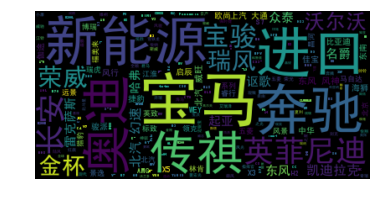

In [11]:
from wordcloud import WordCloud
font = r'C:\Users\10406\Desktop\simheittf\simhei.ttf'
wordcloud = WordCloud(font_path=font).generate(final)
final = " ".join(jieba.cut(final))

%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [12]:
from wordcloud import WordCloud
font = r'C:\Users\10406\Desktop\simheittf\simhei.ttf'
wordcloud = WordCloud(font_path=font,                      

                      background_color='white', 

                      max_words=400,

                      max_font_size=50,

                      width=200,
                      height = 150,
                      margin = 2,
 
                      prefer_horizontal = 0.8
                     ).generate(final)
final = " ".join(jieba.cut(final))

Populating the interactive namespace from numpy and matplotlib


(-0.5, 199.5, 149.5, -0.5)

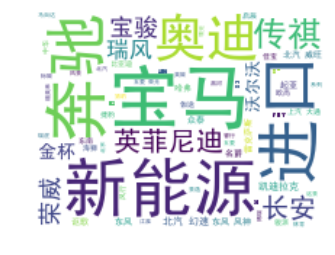

In [13]:
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [14]:
data['类型'].value_counts().head(10)

小型SUV     50
中型车       50
中型SUV     50
紧凑型SUV    50
MPV       49
紧凑型车      49
中大型SUV    33
小型车       33
中大型车      31
微面        29
Name: 类型, dtype: int64

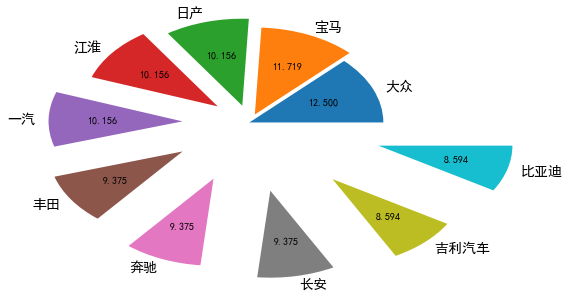

In [15]:
labels= list(data['车牌'].value_counts().head(10).index)
fracs = list(data['车牌'].value_counts().head(10).values)
explode = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%.3f')
plt.show()

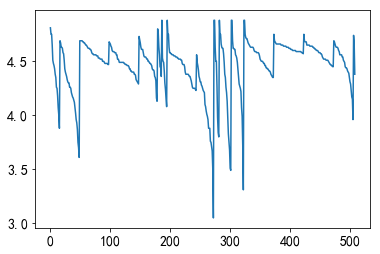

In [16]:
data['评分'].plot()
plt.show()

C:\Python\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


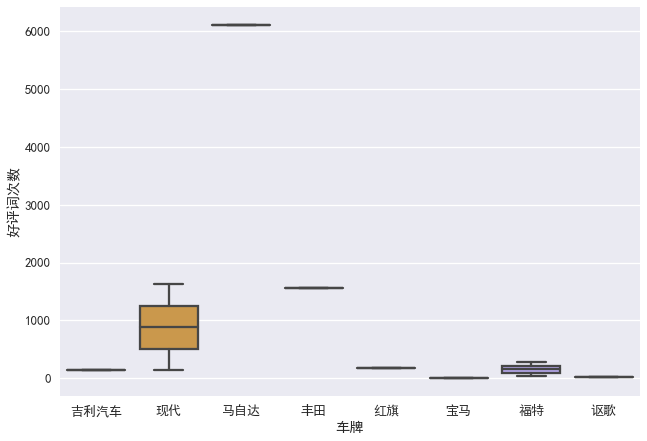

In [17]:
import seaborn as sns
import matplotlib as mpl

sns.set_context("talk")
gz_data = data[data['类型']=='中型车'].head(10)
sns.boxplot(x=gz_data['车牌'], y=gz_data['好评词次数'].astype(np.int64))
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.show()

C:\Python\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


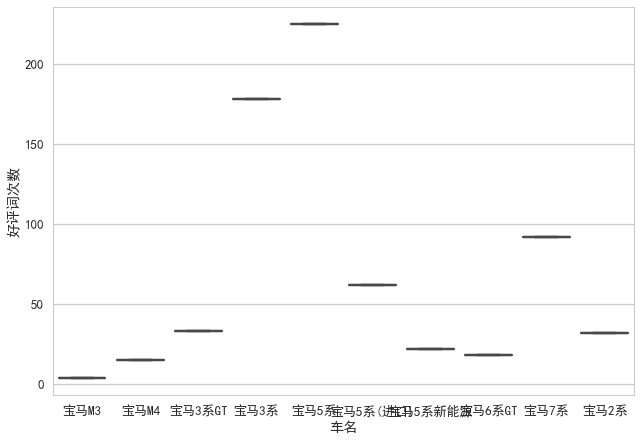

In [18]:
gz_data = data[data['车牌']=='宝马'].head(10)
sns.boxplot(x=gz_data['车名'], y=gz_data['好评词次数'].astype(np.int64))
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.show()

In [19]:
data.head(2)

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN


In [20]:
data.groupby(by='类型').agg({'评分':sum}).reset_index()

,类型,评分
0,MPV,218.83
1,中型SUV,228.90
2,中型车,224.14
3,中大型SUV,147.61
4,中大型车,139.26
5,低端皮卡,91.92
6,大型SUV,13.78
7,大型车,32.00
8,小型SUV,227.63
9,小型车,140.38


In [21]:
data.groupby(by='类型').agg({'评分':['max', 'min']}).reset_index()

类型    评分      
             max   min
0      MPV  4.88  4.23
1    中型SUV  4.75  4.45
2      中型车  4.68  4.29
3   中大型SUV  4.69  3.96
4     中大型车  4.73  4.13
5     低端皮卡  4.88  3.31
6    大型SUV  4.74  4.38
7      大型车  4.80  4.36
8    小型SUV  4.88  4.35
9      小型车  4.69  3.61
10      微卡  4.88  3.80
11     微型车  4.81  3.88
12      微面  4.56  3.05
13  紧凑型SUV  4.75  4.57
14    紧凑型车  4.69  4.47
15      跑车  4.88  4.08
16      轻客  4.88  3.49

In [22]:
data.groupby(by=['类型', '车牌']).agg({'评分':sum}).reset_index().head(10)

,类型,车牌,评分
0,MPV,上汽大通,4.53
1,MPV,东风,4.38
2,MPV,东风风行,17.80
3,MPV,克莱斯勒,4.56
4,MPV,别克,8.78
5,MPV,力帆汽车,4.58
6,MPV,北汽威旺,8.77
7,MPV,北汽幻速,4.37
8,MPV,北汽昌河,4.32
9,MPV,启辰,4.75


In [23]:
type_ave = data.groupby('类型')['评分'].mean()
type_ave

类型
MPV       4.465918
中型SUV     4.578000
中型车       4.482800
中大型SUV    4.473030
中大型车      4.492258
低端皮卡      4.377143
大型SUV     4.593333
大型车       4.571429
小型SUV     4.552600
小型车       4.253939
微卡        4.364444
微型车       4.388125
微面        4.067931
紧凑型SUV    4.626000
紧凑型车      4.576122
跑车        4.398889
轻客        4.276500
Name: 评分, dtype: float64

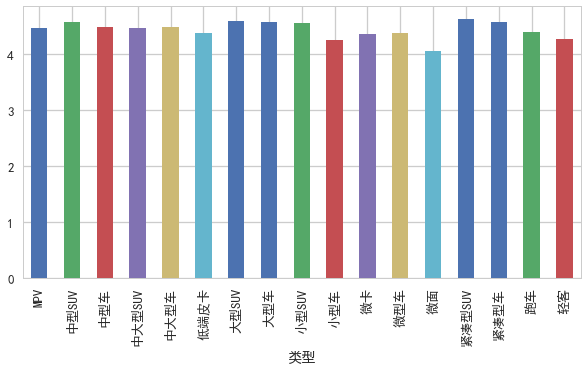

In [24]:
plt.figure(figsize=(10,5))
type_ave.plot.bar()
plt.show()

In [25]:
type_ave = data.groupby('车牌')['评分'].mean()
type_ave.sort_values(ascending=False).head() 

车牌
野马汽车     4.730000
云度       4.710000
捷途       4.690000
北汽新能源    4.663333
陆风       4.655000
Name: 评分, dtype: float64

In [26]:
def plotlinebar(dataType_list, data_sala, data_num):
    dataType_sala = []
    for i in range(len(dataType_list)):
        numa = list(data_sala[dataType_list[i]].index)
        numb = list(data_sala[dataType_list[i]].values)
        result = sum(np.multiply(np.array(numa), np.array(numb)))/sum(numb)
        dataType_sala.append(result)
    dataType_sala = np.array(dataType_sala)
    
    angles = np.linspace(0, 2*np.pi, len(dataType_list), endpoint=False)
    data = np.concatenate((dataType_sala, [dataType_sala[0]]))
    angles = np.concatenate((angles, [angles[0]]))
                            
    ax = plt.figure(figsize=(10, 10)).add_subplot(111, polar=True)
    ax.plot(angles, data, 'bo-', linewidth=2)
    ax.fill(angles, data, facecolor='r', alpha=0.3)
    ax.set_thetagrids(angles*180/np.pi, dataType_list)    
    plt.show()

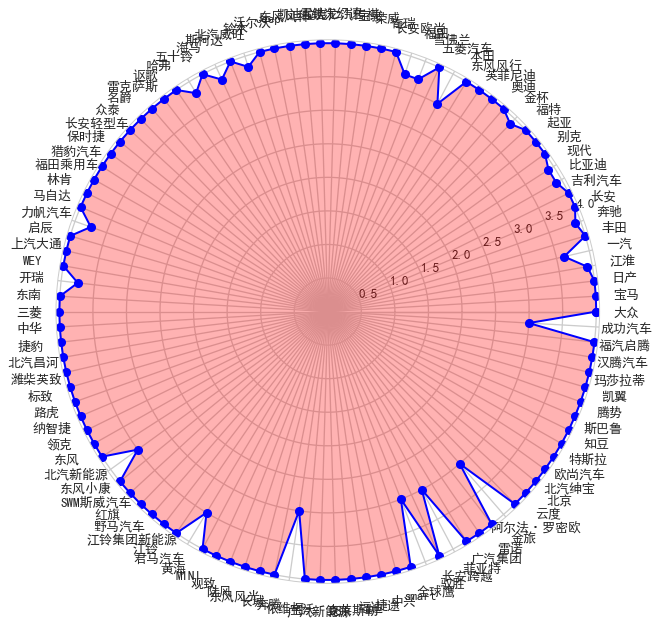

In [27]:
indcateType_list = list(data['车牌'].value_counts().index) 
indcate_sala = data['评分'].astype(np.int64).groupby(data['车牌']).value_counts()
indcate_num = list(data['车牌'].value_counts())
plotlinebar(indcateType_list, indcate_sala, indcate_num)

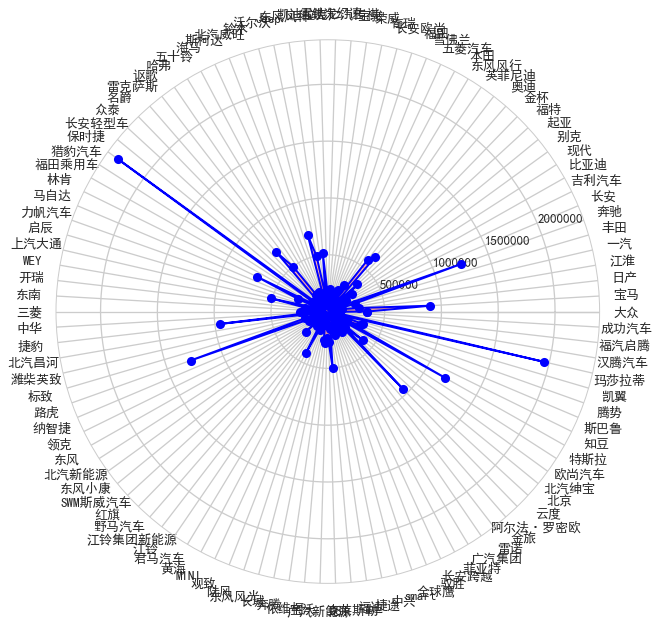

In [28]:
indcateType_list = list(data['车牌'].value_counts().index)
indcate_sala = data['最高价'].astype(np.int64).groupby(data['车牌']).value_counts()
indcate_num = list(data['车牌'].value_counts())
plotlinebar(indcateType_list, indcate_sala, indcate_num)

In [29]:
ave = (data['最高价']+data['最低价'])/2
ave.head()

0    120300.0
1     89800.0
2     60800.0
3     69900.0
4     86800.0
dtype: float64

In [30]:
dicts = {'类型':data['类型'],'车牌':data['车牌'],'车名':data['车名'],'评分':data['评分'],'平均价':ave,'最高价':data['最高价'],'最低价':data['最低价']}
newdata = pd.DataFrame(dicts)
newdata.head()

,平均价,最低价,最高价,类型,评分,车名,车牌
0,120300.0,95800,144800,微型车,4.81,奔奔EV,长安
1,89800.0,85800,93800,微型车,4.75,江铃E200N,江铃集团新能源
2,60800.0,59800,61800,微型车,4.75,EC系列,北汽新能源
3,69900.0,69900,69900,微型车,4.65,众泰E200,众泰
4,86800.0,82800,90800,微型车,4.51,江铃E200L,江铃集团新能源


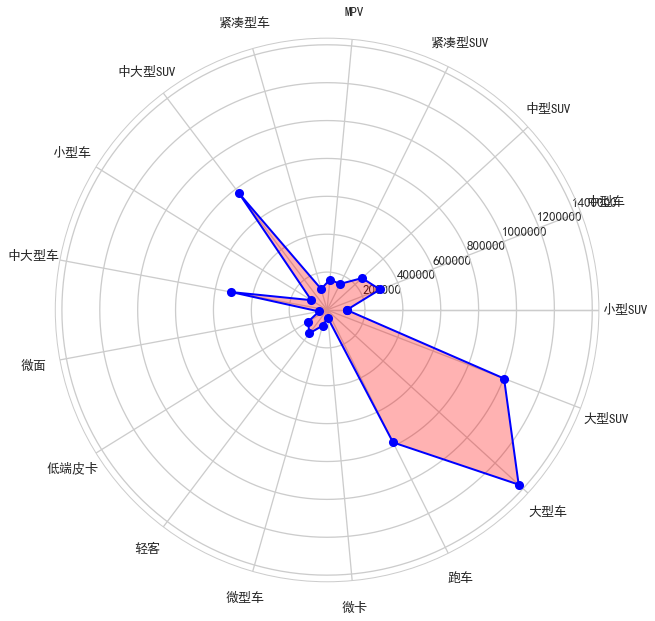

In [31]:
indcateType_list = list(newdata['类型'].value_counts().index)  
indcate_sala = newdata['平均价'].astype(np.int64).groupby(newdata['类型']).value_counts()
indcate_num = list(newdata['类型'].value_counts())
plotlinebar(indcateType_list, indcate_sala, indcate_num)

C:\Python\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


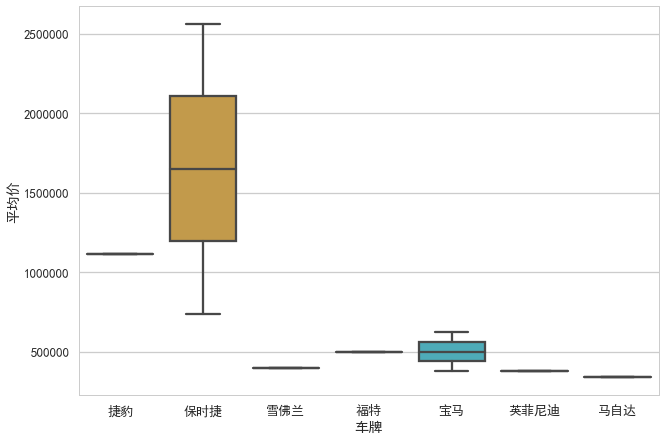

In [32]:
gz_data = newdata[newdata['类型']=='跑车']
sns.boxplot(x=gz_data['车牌'], y=gz_data['平均价'].astype(np.int64))
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.show()

In [33]:
text = data.好评词.iloc[0]
text

'乘坐空间不错,外观时尚,外观比较时尚'

In [35]:
# 
from snownlp import SnowNLP  
s = SnowNLP(text)
s.sentiments

0.9999576267345791

In [36]:
def get_sentiment_cn(text):  
    s = SnowNLP(str(text))    
    return s.sentiments

In [37]:
data["sentiment"] = data.好评词.apply(get_sentiment_cn)  
data.head()

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L,sentiment
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0,0.999958
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN,0.901265
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN,0.996210
3,众泰E200,众泰,微型车,4.65,69900,69900,61,"悬架减震硬,后备厢空间有点小,悬架减震偏硬",45,"外观时尚,乘坐空间不错,安全配置挺好,悬架减震硬,转向手感很轻,乘坐空间完全够用,后备厢空间...",212,"外观时尚,乘坐空间不错,安全配置挺好",113,11.4,11.4,0.999932
4,江铃E200L,江铃集团新能源,微型车,4.51,90800,82800,9,"充电速度太长了,续航里程短",6,"充电速度太长了,续航里程短,乘坐空间可以的",9,乘坐空间可以的,3,10.0,10.0,0.674340
